In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
df = pd.read_csv("data/netflix_titles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [5]:
df.shape


(8807, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], format='%B %d, %Y', errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


In [9]:
df.fillna({'rating':'unknown','cast':'unknown','country':'unknown','director':'unknown'}, inplace=True)
df.isna().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added          10
release_year         0
rating               0
duration             3
listed_in            0
description          0
month_added         10
month_name_added    10
year_added          10
dtype: int64

In [10]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN,NaN
6795,s6796,TV Show,Frasier,unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN,NaN
6806,s6807,TV Show,Friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN,NaN
6901,s6902,TV Show,Gunslinger Girl,unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN,NaN
7196,s7197,TV Show,Kikoriki,unknown,Igor Dmitriev,unknown,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN,NaN
7254,s7255,TV Show,La Familia P. Luche,unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN,NaN
7406,s7407,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,NaN
7847,s7848,TV Show,Red vs. Blue,unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN,NaN


In [11]:
most_recent_date_added= df['date_added'].max()
df.fillna({'date_added':most_recent_date_added}, inplace=True)

In [12]:
df[df.show_id=='s6066']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
6065,s6066,Movie,A Wrinkle in Time,Ava DuVernay,"Storm Reid, Oprah Winfrey, Reese Witherspoon, ...",United States,2018-09-25,2018,PG,110 min,Children & Family Movies,"Years after their father disappears, Meg and h...",9.0,September,2018.0


In [13]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4.0,April,2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9.0,September,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,8.0,August,2016.0


In [14]:
df.loc[df['director'] == 'Louis C.K.','duration'] = df['rating']

In [15]:
df.loc[df['director'] == 'Louis C.K.','rating'] = 'unknown'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8807 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  month_added       8797 non-null   float64       
 13  month_name_added  8797 non-null   object        
 14  year_added        8797 n

In [17]:
df[df.month_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unknown,Anthony Bourdain,United States,2021-09-25,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN,NaN
6795,s6796,TV Show,Frasier,unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2021-09-25,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN,NaN
6806,s6807,TV Show,Friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2021-09-25,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN,NaN
6901,s6902,TV Show,Gunslinger Girl,unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2021-09-25,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN,NaN
7196,s7197,TV Show,Kikoriki,unknown,Igor Dmitriev,unknown,2021-09-25,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN,NaN
7254,s7255,TV Show,La Familia P. Luche,unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2021-09-25,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN,NaN
7406,s7407,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2021-09-25,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,NaN
7847,s7848,TV Show,Red vs. Blue,unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2021-09-25,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2021-09-25,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN,NaN


In [18]:
df['month_added'] = df['month_added'].fillna(df['date_added'].dt.month)
df['month_name_added'] = df['month_name_added'].fillna(df['date_added'].dt.month_name())
df['year_added'] = df['year_added'].fillna(df['date_added'].dt.year)

In [19]:
df[df.show_id=='s6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",9.0,September,2021.0


In [20]:
df['month_added'] = df['month_added'].astype(int)
df['year_added'] = df['year_added'].astype(int)

In [21]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=months_order, ordered=True)

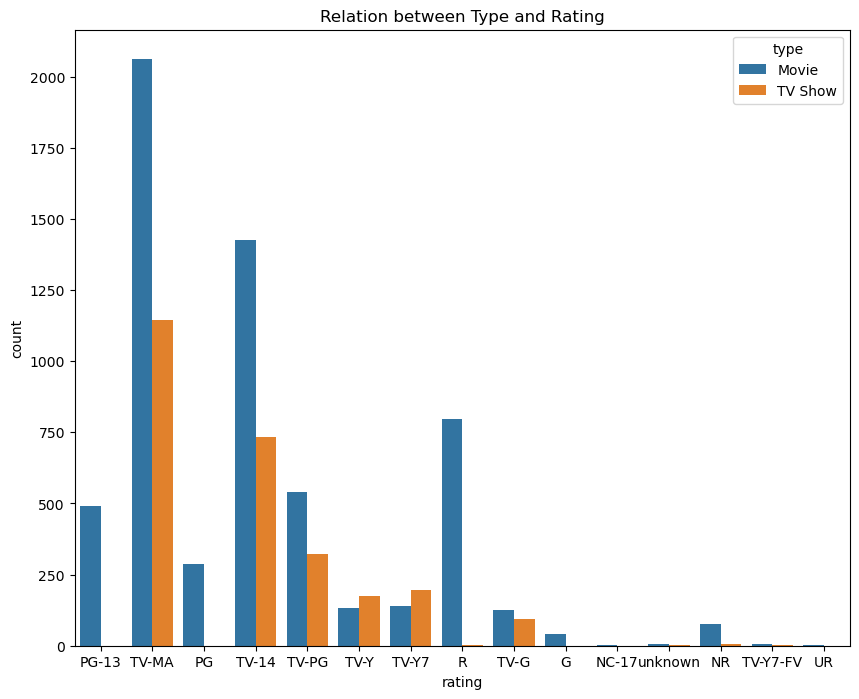

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

In [23]:
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

print('Movies Shape:', df_movies.shape)
print('TV Shows Shape:', df_shows.shape)

Movies Shape: (6131, 15)
TV Shows Shape: (2676, 15)


In [24]:
df_movies['duration'] = df_movies['duration'].str.replace('min', '').str.strip().astype(int)
df_shows['duration'] = df_shows['duration'].str.replace(' Seasons?', '', regex=True).str.strip().astype(int)

df_movies.reset_index(drop=True, inplace=True)
df_shows.reset_index(drop=True, inplace=True)

In [25]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6131 non-null   object        
 1   type              6131 non-null   object        
 2   title             6131 non-null   object        
 3   director          6131 non-null   object        
 4   cast              6131 non-null   object        
 5   country           6131 non-null   object        
 6   date_added        6131 non-null   datetime64[ns]
 7   release_year      6131 non-null   int64         
 8   rating            6131 non-null   object        
 9   duration          6131 non-null   int32         
 10  listed_in         6131 non-null   object        
 11  description       6131 non-null   object        
 12  month_added       6131 non-null   int32         
 13  month_name_added  6131 non-null   category      
 14  year_added        6131 n

In [26]:

def remove_outliers(dataframe, column_name):
   
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]

    mean_value = dataframe[column_name].mean()
    std_value = dataframe[column_name].std()
    lower_limit = mean_value - 3 * std_value
    upper_limit = mean_value + 3 * std_value
    std_outliers = dataframe[(dataframe[column_name] < lower_limit) | (dataframe[column_name] > upper_limit)]

    print(f"Outliers in the '{column_name}' column:")
    print("IQR method:", round((iqr_outliers.shape[0] / dataframe.shape[0]) * 100, 2), '% of the entire dataframe.')
    print(f"STD method:", round((std_outliers.shape[0] / dataframe.shape[0]) * 100, 2), '% of the entire dataframe.')

    method = input("Enter the method for outlier removal (iqr/std): ").lower()

    if method == 'iqr':
        cleaned_dataframe = dataframe[~((dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound))]
        
    elif method == 'std':
        cleaned_dataframe = dataframe[~((dataframe[column_name] < lower_limit) | (dataframe[column_name] > upper_limit))]
        
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

    return cleaned_dataframe

In [27]:
no_duration_outliers_shows= remove_outliers(df_shows, 'duration')

Outliers in the 'duration' column:
IQR method: 9.68 % of the entire dataframe.
STD method: 2.47 % of the entire dataframe.
Enter the method for outlier removal (iqr/std): std


In [28]:
no_duration_outliers_movies = remove_outliers(df_movies, 'duration')

Outliers in the 'duration' column:
IQR method: 7.34 % of the entire dataframe.
STD method: 0.91 % of the entire dataframe.
Enter the method for outlier removal (iqr/std): std


In [29]:
no_duration_outliers_shows = remove_outliers(no_duration_outliers_shows, 'release_year')

Outliers in the 'release_year' column:
IQR method: 6.28 % of the entire dataframe.
STD method: 1.69 % of the entire dataframe.
Enter the method for outlier removal (iqr/std): std


In [30]:
no_duration_outliers_movies = remove_outliers(no_duration_outliers_movies, 'release_year')

Outliers in the 'release_year' column:
IQR method: 9.42 % of the entire dataframe.
STD method: 2.73 % of the entire dataframe.
Enter the method for outlier removal (iqr/std): std


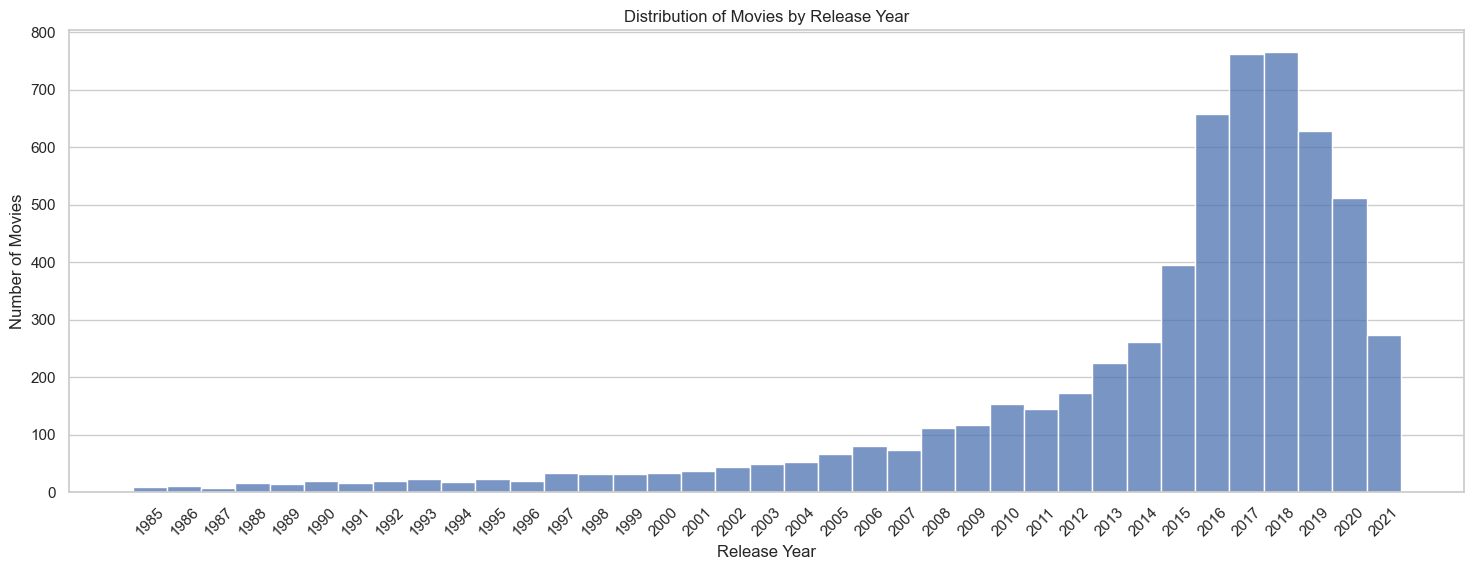

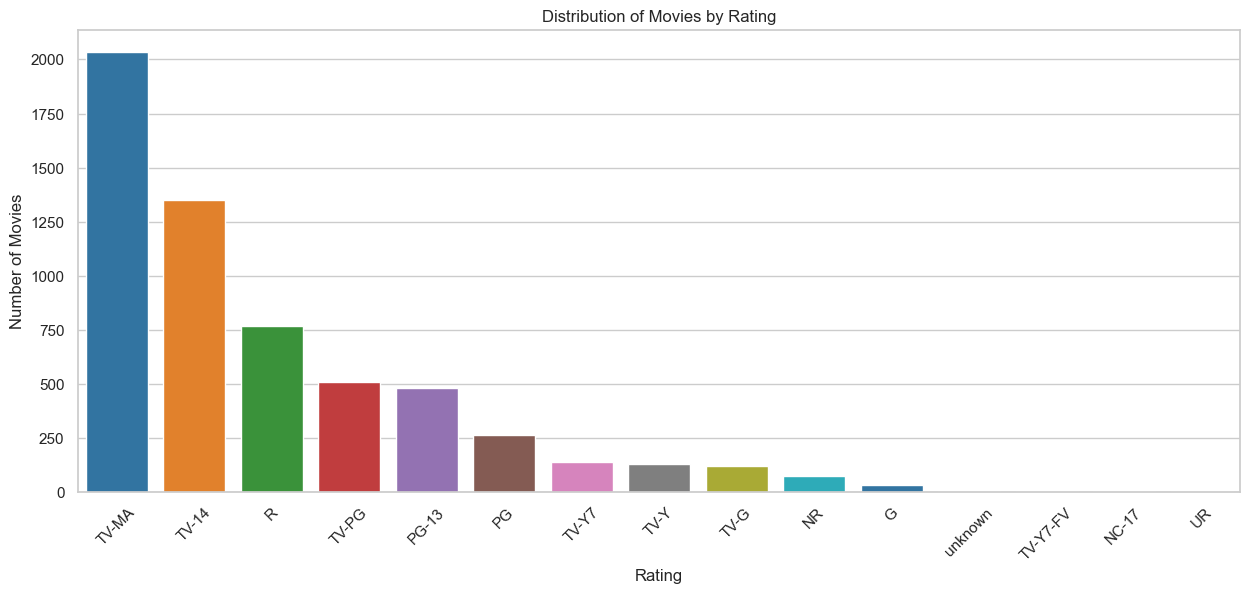

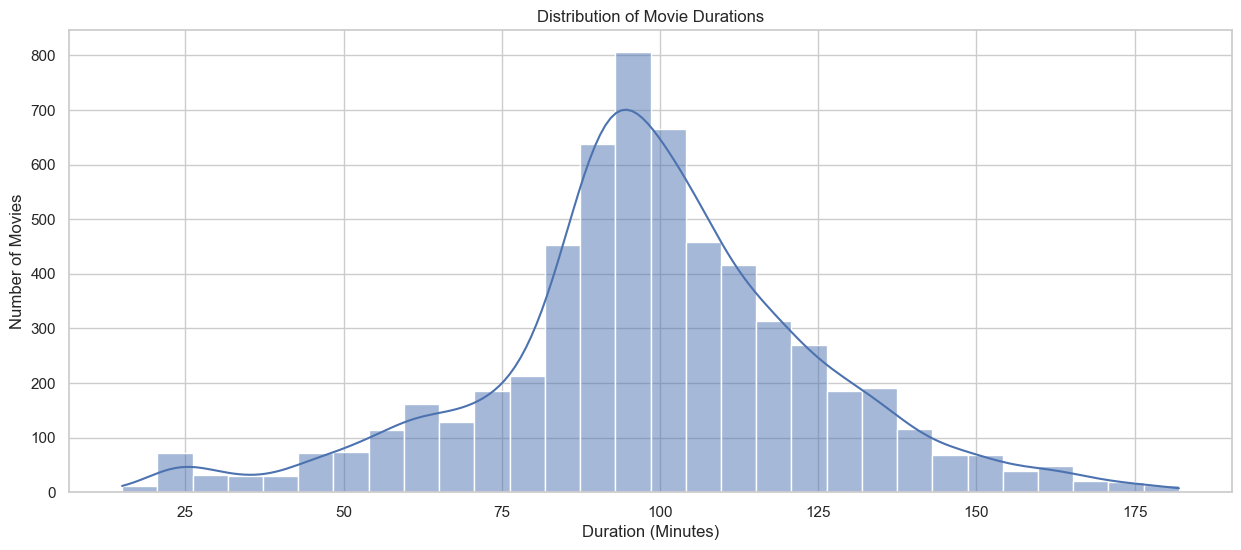

In [31]:
sns.set(style="whitegrid")

# Distribution by Release Year
min_year = no_duration_outliers_movies['release_year'].min()
max_year = no_duration_outliers_movies['release_year'].max()
plt.figure(figsize=(18, 6))
sns.histplot(data=no_duration_outliers_movies, x='release_year', bins=range(min_year, max_year + 1), discrete=True)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(range(min_year, max_year + 1), rotation=45)
plt.grid(axis='x', linestyle='', which='both', color='none')
plt.show()

# Distribution by Rating
plt.figure(figsize=(15, 6))
sns.countplot(data=no_duration_outliers_movies, x='rating', order = no_duration_outliers_movies['rating'].value_counts().index, palette='tab10')
plt.title('Distribution of Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Duration of movies
plt.figure(figsize=(15, 6))
sns.histplot(data=no_duration_outliers_movies, x='duration', bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

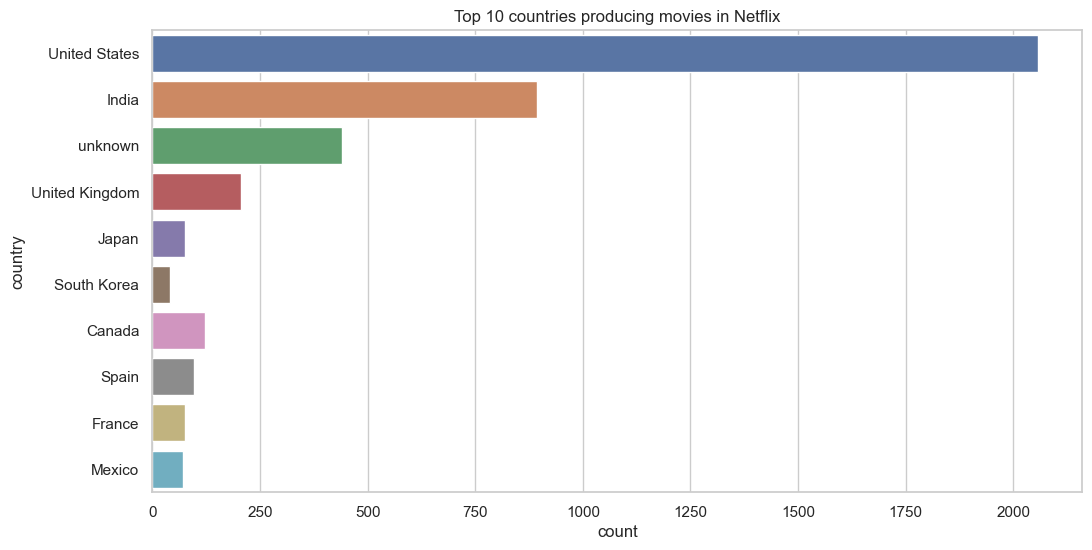

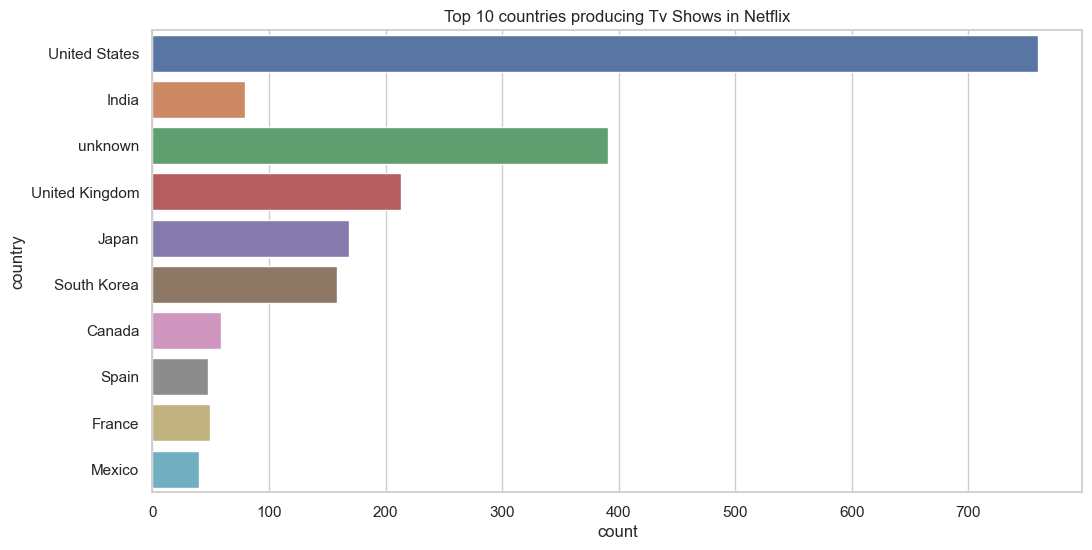

In [32]:
plt.figure(figsize = (12,6))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10],data= df_movies)
plt.title('Top 10 countries producing movies in Netflix')
plt.show()

plt.figure(figsize = (12,6))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10],data= df_shows)
plt.title('Top 10 countries producing Tv Shows in Netflix')
plt.show()

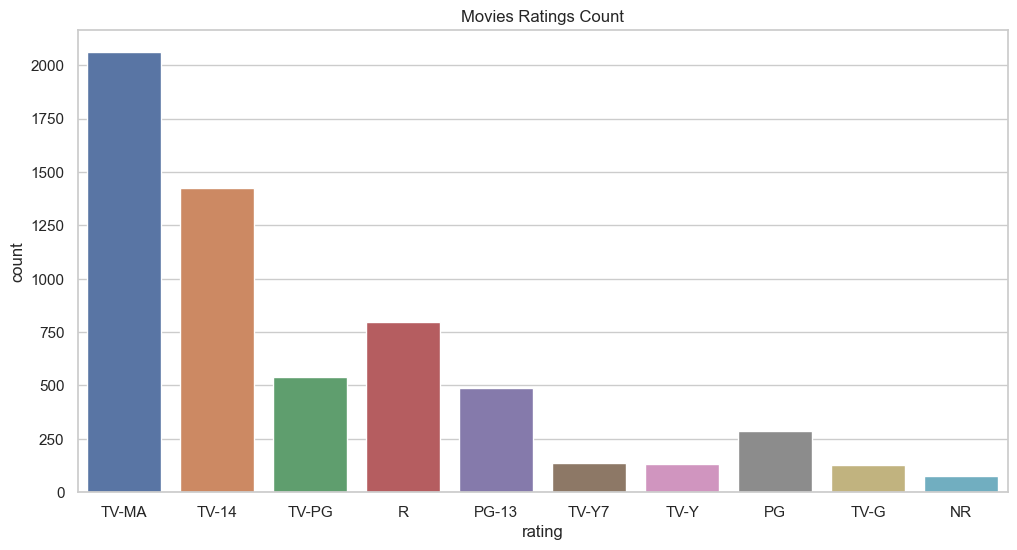

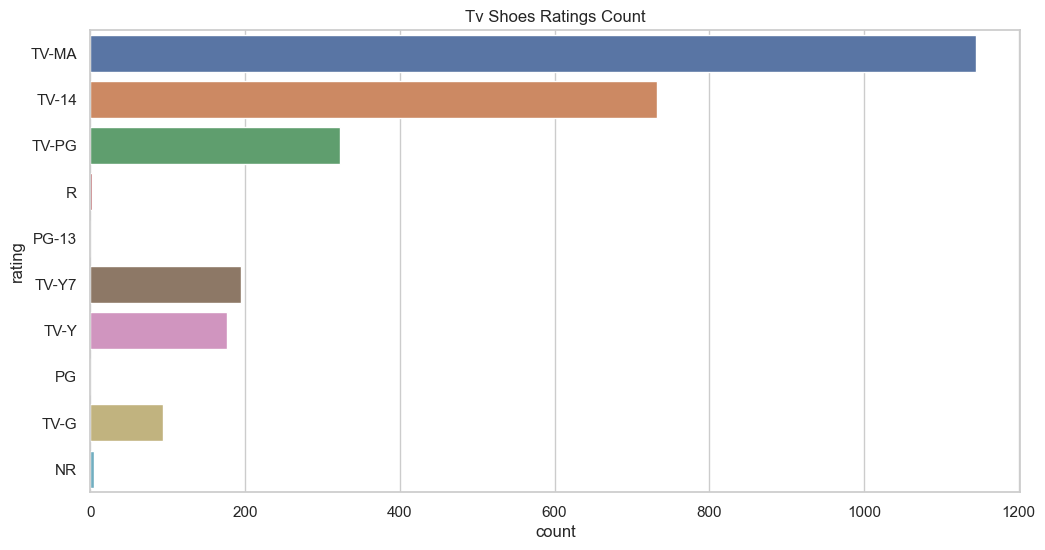

In [33]:
plt.figure(figsize = (12,6))
sns.countplot(x='rating', order = df['rating'].value_counts().index[0:10],data= df_movies)
plt.title('Movies Ratings Count')
plt.show()

plt.figure(figsize = (12,6))
sns.countplot(y='rating', order = df['rating'].value_counts().index[0:10],data= df_shows)
plt.title('Tv Shows Ratings Count')
plt.show()

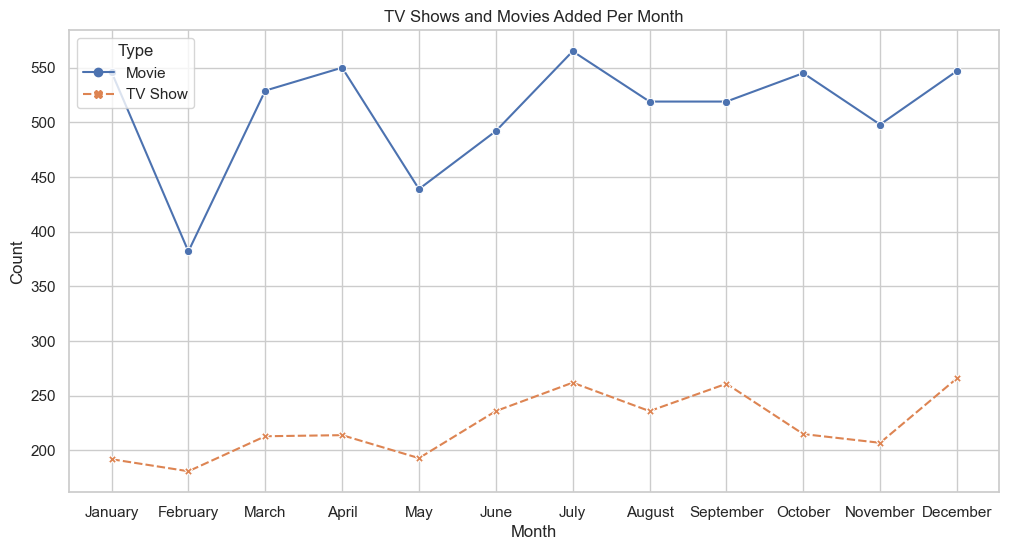

In [34]:
counts_per_month = df.groupby(['month_name_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_per_month, markers=True)
plt.title('TV Shows and Movies Added Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.grid(True)
plt.show()

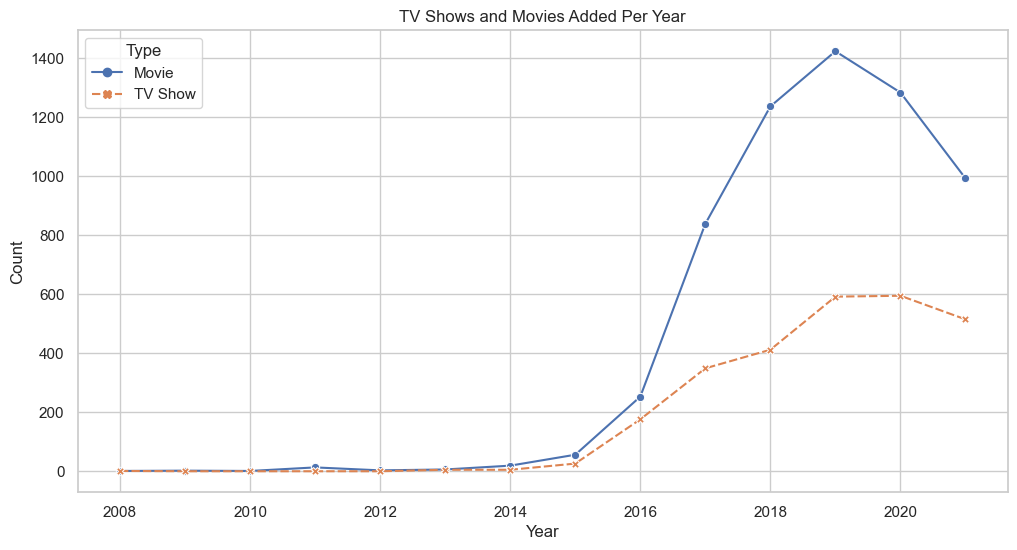

In [35]:
counts_per_month = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_per_month, markers=True)
plt.title('TV Shows and Movies Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.grid(True)
plt.show()

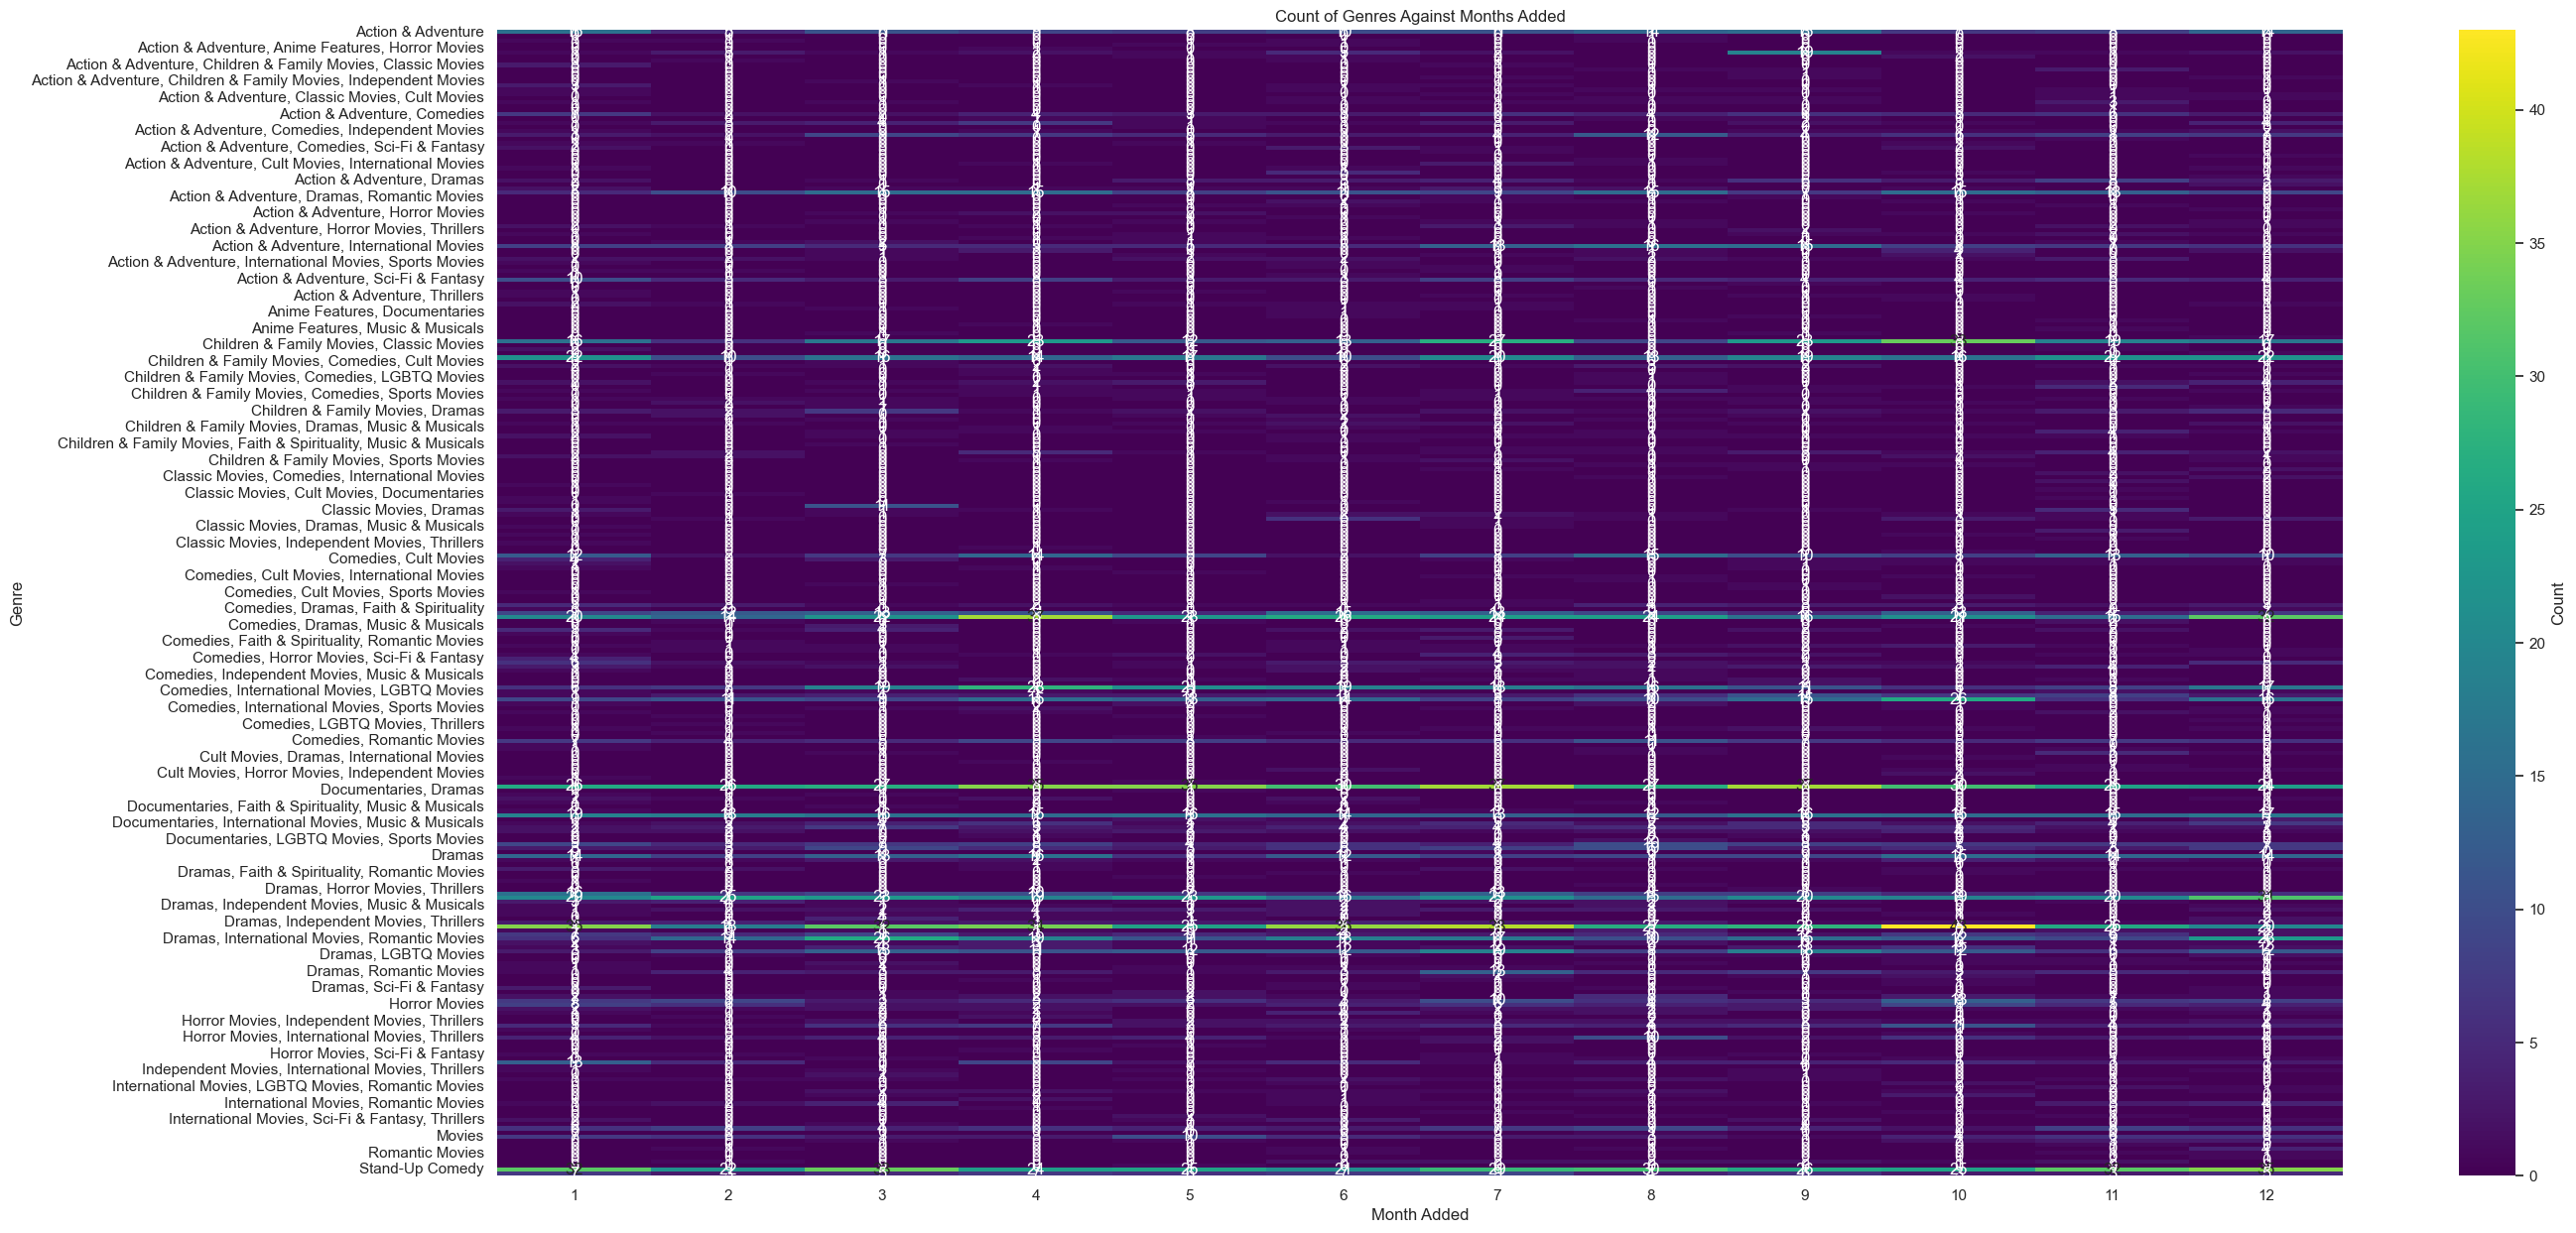

In [36]:
df_exploded = df_movies.explode('listed_in')
pivot_table = pd.crosstab(df_exploded['listed_in'], df_exploded['month_added'])

plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Count of Genres Against Months Added')
plt.xlabel('Month Added')
plt.ylabel('Genre')
plt.show()

this piece of code didnt really turn out as expected
